
# Projet 2

In [2]:
# import des modules usuels
import numpy as np
import pandas as pd

# options d'affichage
pd.set_option("display.min_rows", 16)

In [3]:
# chargement et traitement des données
geo = pd.read_csv("correspondance-code-insee-code-postal.csv",
                   sep=';',
                   usecols=range(11),
                   index_col="Code INSEE")
geo = geo.sort_index()
geo[['Latitude', 'Longitude']] = geo["geo_point_2d"].str.extract("(.*), (.*)").astype(float)
geo.head()

,Code Postal,Commune,Département,Région,Statut,Altitude Moyenne,Superficie,Population,geo_point_2d,geo_shape,Latitude,Longitude
Code INSEE,,,,,,,,,,,,
01001,01400,L'ABERGEMENT-CLEMENCIAT,AIN,RHONE-ALPES,Commune simple,242.0,1565.0,0.8,"46.1534255214, 4.92611354223","{""type"": ""Polygon"", ""coordinates"": [[[4.926273...",46.153426,4.926114
01002,01640,L'ABERGEMENT-DE-VAREY,AIN,RHONE-ALPES,Commune simple,483.0,912.0,0.2,"46.0091878776, 5.42801696363","{""type"": ""Polygon"", ""coordinates"": [[[5.430089...",46.009188,5.428017
01004,01500,AMBERIEU-EN-BUGEY,AIN,RHONE-ALPES,Chef-lieu canton,379.0,2448.0,13.4,"45.9608475114, 5.3729257777","{""type"": ""Polygon"", ""coordinates"": [[[5.386190...",45.960848,5.372926
01005,01330,AMBERIEUX-EN-DOMBES,AIN,RHONE-ALPES,Commune simple,290.0,1605.0,1.6,"45.9961799872, 4.91227250796","{""type"": ""Polygon"", ""coordinates"": [[[4.895580...",45.996180,4.912273
01006,01300,AMBLEON,AIN,RHONE-ALPES,Commune simple,589.0,602.0,0.1,"45.7494989044, 5.59432017366","{""type"": ""Polygon"", ""coordinates"": [[[5.614854...",45.749499,5.594320


**Projet maison n° 1**

- Ajoutez une colonne 'CP Ville' avec le Code postal + un espace + et le nom de la Ville.
- Ecrivez une fonction qui détermine la commune la plus proche d'un point à partir de sa latitude et sa longitude.
- Ajoutez une fonction de conversion pour pouvoir utiliser la première fonction avec un GPS (degrés, minutes, secondes).

In [4]:
# Ajout d'une colonne 'CP Ville'
geo['CP Ville'] = geo['Code Postal'] + ' ' + geo['Commune']

geo['CP Ville'] 

Code INSEE
01001    01400 L'ABERGEMENT-CLEMENCIAT
01002      01640 L'ABERGEMENT-DE-VAREY
01004          01500 AMBERIEU-EN-BUGEY
01005        01330 AMBERIEUX-EN-DOMBES
01006                    01300 AMBLEON
01007                   01500 AMBRONAY
01008                   01500 AMBUTRIX
01009           01300 ANDERT-ET-CONDON
                     ...              
97610                    97600 KOUNGOU
97611                  97600 MAMOUDZOU
97612                  97630 MTSAMBORO
97613              97650 M'TSANGAMOUJI
97614                   97670 OUANGANI
97615                   97610 PAMANDZI
97616                       97640 SADA
97617                   97680 TSINGONI
Name: CP Ville, Length: 36742, dtype: object

In [5]:
# fonction recherche de ville
def ville(lat, long):
    dist = (geo['Longitude'] - long)**2 + (geo['Latitude'] - lat)**2
    return geo.loc[dist.idxmin()]

In [6]:
ville(46, 5)

Code Postal                                                     01330
Commune                                                    LAPEYROUSE
Département                                                       AIN
Région                                                    RHONE-ALPES
Statut                                                 Commune simple
Altitude Moyenne                                                284.0
Superficie                                                     2013.0
Population                                                        0.3
geo_point_2d                             45.9859131165, 4.98196682865
geo_shape           {"type": "Polygon", "coordinates": [[[5.003545...
Latitude                                                    45.985913
Longitude                                                    4.981967
CP Ville                                             01330 LAPEYROUSE
Name: 01207, dtype: object

In [7]:
# conversion degrés, minutes, secondes => décimal
def dms2dec(deg, mn, sec):
    return deg + mn / 60 + sec / 3600

In [8]:
# on applique la fonction à une coordonnée tirée au hasard
# init du random
np.random.seed(0)

a, b = 41.5, 51.1  # latitude min et max de la France métropolitaine
lat = (b - a) * np.random.random() + a
a, b = -5.1, 9.5  # longitude min et max de la France métropolitaine
long = (b - a) * np.random.random() + a

ville(lat, long)

Code Postal                                                     71330
Commune                                                       BOSJEAN
Département                                            SAONE-ET-LOIRE
Région                                                      BOURGOGNE
Statut                                                 Commune simple
Altitude Moyenne                                                202.0
Superficie                                                     1862.0
Population                                                        0.3
geo_point_2d                             46.7696786287, 5.34727924927
geo_shape           {"type": "Polygon", "coordinates": [[[5.345021...
Latitude                                                    46.769679
Longitude                                                    5.347279
CP Ville                                                71330 BOSJEAN
Name: 71044, dtype: object

In [9]:
# à partir de coordonnées GPS précises
ville(dms2dec(48, 42, 52), dms2dec(2, 14, 45))

Code Postal                                                     91120
Commune                                                     PALAISEAU
Département                                                   ESSONNE
Région                                                  ILE-DE-FRANCE
Statut                                                Sous-préfecture
Altitude Moyenne                                                118.0
Superficie                                                     1168.0
Population                                                       30.3
geo_point_2d                             48.7146765876, 2.22881488083
geo_shape           {"type": "Polygon", "coordinates": [[[2.259350...
Latitude                                                    48.714677
Longitude                                                    2.228815
CP Ville                                              91120 PALAISEAU
Name: 91477, dtype: object

**Projet maison n° 2**

La colonne "geo_shape" comporte des chaines de catactères au format JSON. Elles représentent les formes géométriques des communes qui sont soit des polygones soit composées de plusieurs polygones.

- Utiliser la librairie Python json pour parser la colonne "geo_shape".
- Donner le décompte des valeurs accédées avec la clé "type".
- Donner le décompte des longueurs des listes accédées avec la clé "coordinates".
- Quelle commune est la plus complexe géométriquement ?
- Quelle commune est la seconde la plus complexe géométriquement ?
- Quelles sont les villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?
- Pour ces villes vérifier que le premier polygone contient bien le second (enclave). NB : installer la librairie shapely, utiliser la classe Polygon de shapely.geometry. Sur Windows shapely peut nécessiter d'installer la dll "geos_c.dll" dans le répertoire "Library/bin" de votre environnement Python.

In [10]:
# Utiliser la librairie Python json pour parser la colonne "geo_shape".
import json

#d = geo['geo_shape'].apply(lambda x: json.loads(x))
geo_shape = pd.DataFrame(index= geo['geo_shape'].index, data={'type':  geo['geo_shape'].apply(lambda x: json.loads(x)['type']),
                                                              'coordinates': geo['geo_shape'].apply(lambda x: json.loads(x)['coordinates'])
                                                              }
                        )

geo_shape

,type,coordinates
Code INSEE,,
01001,Polygon,"[[[4.92627342692396, 46.1200517234555], [4.921..."
01002,Polygon,"[[[5.430089291292173, 45.98275997279625], [5.4..."
01004,Polygon,"[[[5.386190824025674, 45.930927620632], [5.374..."
01005,Polygon,"[[[4.895580369408855, 45.97991618124606], [4.8..."
01006,Polygon,"[[[5.614854625053272, 45.734638855121595], [5...."
01007,Polygon,"[[[5.413533405897647, 45.97889779714948], [5.3..."
01008,Polygon,"[[[5.321986043355919, 45.92234494663176], [5.3..."
01009,Polygon,"[[[5.65639346945457, 45.76021095279123], [5.64..."
...,...,...


In [11]:
geo_shape.index.is_unique

True

In [54]:
# Donner le décompte des valeurs accédées avec la clé "type".
geo_shape['type'].value_counts()

Polygon         36670
MultiPolygon       72
Name: type, dtype: int64

In [55]:
# Donner le décompte des longueurs des listes accédées avec la clé "coordinates".
geo_shape['coordinates'].str.len().value_counts()

1    36660
2       80
3        1
4        1
Name: coordinates, dtype: int64

In [14]:
# Quelle commune est la plus complexe géométriquement ?
geo.loc[geo_shape['coordinates'].str.len().idxmax()]

Code Postal                                                     83400
Commune                                                        HYERES
Département                                                       VAR
Région                                     PROVENCE-ALPES-COTE D'AZUR
Statut                                               Chef-lieu canton
Altitude Moyenne                                                 60.0
Superficie                                                    13356.0
Population                                                       54.7
geo_point_2d                             43.1018713534, 6.18898508469
geo_shape           {"type": "MultiPolygon", "coordinates": [[[[6....
Latitude                                                    43.101871
Longitude                                                    6.188985
CP Ville                                                 83400 HYERES
Name: 83069, dtype: object

In [63]:
# Quelle commune est la seconde la plus complexe géométriquement ?
geo.loc[geo_shape['coordinates'].drop(geo_shape['coordinates'].str.len().idxmax()).str.len().idxmax()]

# Autre méthode :
geo.loc[geo_shape['coordinates'].str.len() == geo_shape['coordinates'].str.len().value_counts().index[-2]].T

Code INSEE,27701
Code Postal,27100
Commune,VAL-DE-REUIL
Département,EURE
Région,HAUTE-NORMANDIE
Statut,Chef-lieu canton
Altitude Moyenne,23.0
Superficie,2593.0
Population,13.5
geo_point_2d,"49.261335704, 1.21147195365"
geo_shape,"{""type"": ""MultiPolygon"", ""coordinates"": [[[[1...."


In [16]:
# Quelles sont les villes qui sont de type "Polygon" mais dont la longueur des listes accédées avec la clé "coordinates" vaut 2 ?
geo.loc[(geo_shape['type'] == 'Polygon') & (geo_shape['coordinates'].str.len() == 2), 'Commune']


Code INSEE
02232               COYOLLES
05052               EYGLIERS
09042    LA BASTIDE-DE-SEROU
22209              PLOUBALAY
2A272                SARTENE
2B049              CALENZANA
48080               LANGOGNE
67486              SUNDHOUSE
68078              EGUISHEIM
71028            BEAUVERNOIS
Name: Commune, dtype: object

In [98]:
# Pour ces villes vérifier que le premier polygone contient bien le second (enclave)
from shapely.geometry import Polygon

#geo_shape.loc[(geo_shape['type'] == 'Polygon') & (geo_shape['coordinates'].str.len() == 2), 'coordinates'].apply(lambda x: Polygon(x[0], (x[1], )))
geo_shape.loc[(geo_shape['type'] == 'Polygon') & (geo_shape['coordinates'].str.len() == 2), 'coordinates'].apply(lambda x: Polygon(x[1]).within(Polygon(x[0])))

Code INSEE
02232    True
05052    True
09042    True
22209    True
2A272    True
2B049    True
48080    True
67486    True
68078    True
71028    True
Name: coordinates, dtype: bool

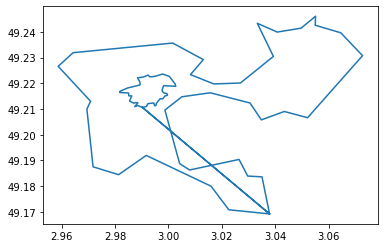

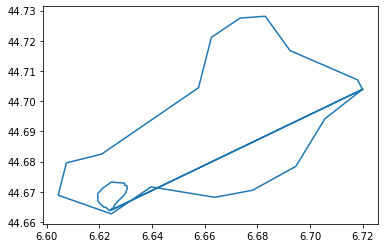

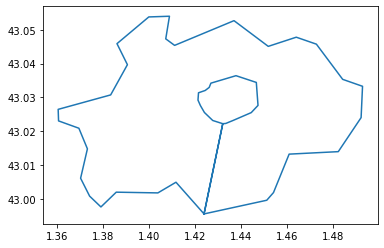

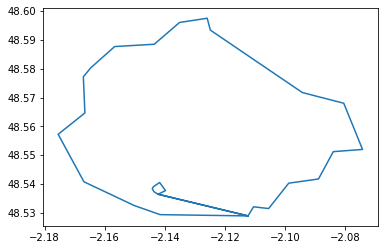

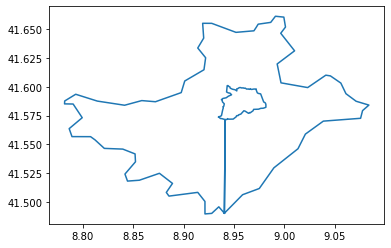

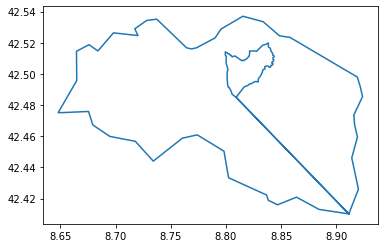

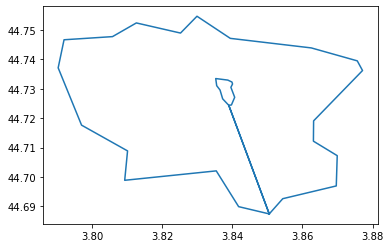

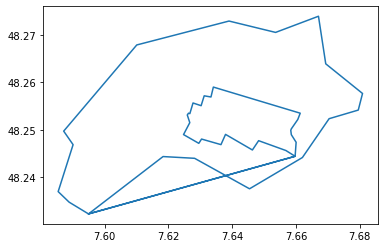

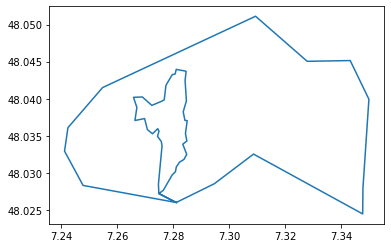

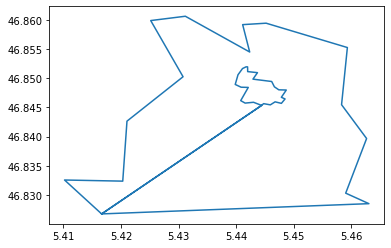

In [128]:
# On peut les tracer pour vérifier
import matplotlib.pyplot as plt
enclaves = geo_shape.loc[(geo_shape['type'] == 'Polygon') & (geo_shape['coordinates'].str.len() == 2), 'coordinates']

for v in enclaves:
    #poly = Polygon(v[0], (v[1],))
    poly = Polygon(sum(v, [])) # pour applatir la liste
    plt.plot(*poly.exterior.xy)
    plt.show()